# What is CNN ?


#### A CNN is a neural network that typically contains several types of layers, which includes :-

* convolutional layer 
* pooling layer, and 
* activation layer.

## Convolutional Layer

* To understand what a CNN is, you need to understand how convolutions work. 

* Imagine you have an image represented as a 5x5 matrix of values, and you take a 3x3 matrix and slide that 3x3 window around the image. 

* At each position the 3x3 visits, you matrix multiply the values of your 3x3 window by the values in the image that are currently being covered by the window. 

* This results in a single number the represents all the values in that window of the image. 

Here’s a gif for clarity:

![Conv Gif](./conv.gif)

## Level - 1 - Code the Convolutional Layer


![Detailed Conv Gif](./conv_detailed.gif)

### Question 1

In [1]:
# Write a function which does the convolution.
# Code for a 3d Matrix
# Before writing out code, write function header with parameters and get it reviewed by Mentors

In [2]:
import numpy as np

In [266]:
x = np.random.randn(3, 7, 7)
filter1 = np.random.randn(3, 3, 3)
filter2 = np.random.randn(3, 3, 3)
filter3 = np.random.randn(3, 3, 3)
filter_list = [filter1, filter2, filter3]
bias1 = 0
bias2 = 1
bias3 = 0
bias_list = [bias1, bias2]

In [267]:
def get_final_array_shape(input_shape, filter_shape, stride):
    x = int((np.ceil(input_shape[1] - filter_shape[0])/stride) + 1)
    y = int((np.ceil(input_shape[2] - filter_shape[1])/stride) + 1)
    return x, y

In [268]:
def get_crop_indexes(i, stride, filter_length):
    return (i*stride, i*stride+filter_length)

In [269]:
def get_convolved_array(x, filter_list, bias_list, stride):
    f = 0
    finalx, finaly = get_final_array_shape(x.shape, filter_list[0].shape, stride)
    conv_array = np.empty((len(filter_list), finalx, finaly))
    for filters, bias in zip(filter_list, bias_list):
        for i in range(finalx):
            row_start, row_end = get_crop_indexes(i, stride, filters.shape[0])
            for j in range(finaly):
                col_start, col_end = get_crop_indexes(j, stride, filters.shape[1])
                z = x[:filters.shape[2], row_start:row_end, col_start:col_end]
                conv_array[f, i, j] = np.sum(filters*z) + bias   
        f += 1        
    return conv_array

In [270]:
conv_array = get_convolved_array(x, filter_list, bias_list, 2)

In [271]:
conv_array

array([[[ 4.7262596 , -2.5791068 , -4.65289586],
        [-1.52697727, -8.42617326, -4.94058985],
        [-2.96601876,  2.12388874, -0.10132116]],

       [[ 1.94419073,  7.8645692 ,  5.15809588],
        [-4.18138361,  0.53793028,  7.99927314],
        [-4.05038525,  9.42588026, -2.93177034]],

       [[ 0.57958535, -0.87697155, -0.01689867],
        [-1.40384564,  0.70934458, -0.44550123],
        [-1.27833796,  1.63695598, -0.9667076 ]]])

## Pooling Layers

* Pooling works very much like convoluting, where we take a kernel and move the kernel over the image, the only difference is the function that is applied to the kernel and the image window isn’t linear.

* Max pooling and Average pooling are the most common pooling functions. 

* Max pooling takes the largest value from the window of the image currently covered by the kernel, while average pooling takes the average of all values in the window.

![Pooling Gif](./pooling.gif)

## Level - 2 - Code the Pooling Layer

![Detailed Conv Gif](./Max_pooling.png)

### Question 1

In [272]:
# Write a function which does the max pooling.
# Code for a 3d Matrix
# Before writing out code, write function header with parameters and get it reviewed by Mentors

In [273]:
conv_array[0]

array([[ 4.7262596 , -2.5791068 , -4.65289586],
       [-1.52697727, -8.42617326, -4.94058985],
       [-2.96601876,  2.12388874, -0.10132116]])

In [274]:
def get_max_pooled_feature(conv_array, filter_shape, stride):
    finalx, finaly = get_final_array_shape(conv_array.shape, filter_shape, stride)
    pooled_array = np.empty((conv_array.shape[0], finalx, finaly))
    for f in range(conv_array.shape[0]):
        for i in range(finalx):
            for j in range(finaly):
                row_start, row_end = get_crop_indexes(i, stride, filter_shape[0])
                col_start, col_end = get_crop_indexes(j, stride, filter_shape[1])
                z = x[f, row_start:row_end, col_start:col_end]
                pooled_array[f, i, j] = np.max(z)
    return pooled_array            

In [312]:
max_pooled_array = get_max_pooled_feature(conv_array, (2, 2), 2)

### Question 2

In [313]:
# Write a function which does the average convolution.
# Code for a 3d Matrix
# Before writing out code, write function header with parameters and get it reviewed by Mentors

In [314]:
def get_average_pooled_feature(conv_array, filter_shape, stride):
    finalx, finaly = get_final_array_shape(conv_array.shape, filter_shape, stride)
    pooled_array = np.empty((conv_array.shape[0], finalx, finaly))
    for f in range(conv_array.shape[0]):
        for i in range(finalx):
            for j in range(finaly):
                row_start, row_end = get_crop_indexes(i, stride, filter_shape[0])
                col_start, col_end = get_crop_indexes(j, stride, filter_shape[1])
                z = x[f, row_start:row_end, col_start:col_end]
                pooled_array[f, i, j] = np.average(z)
    return pooled_array            

In [316]:
avg_pooled_array = get_average_pooled_feature(conv_array, (2, 2), 2)
avg_pooled_array

array([[[-0.12180192]],

       [[-0.39952408]],

       [[-0.59432133]]])

# Lets Load an image and visualize the Conv and Pool

### Load the Conv and Max pool using Keras

In [317]:
from keras.layers import Convolution2D, MaxPooling2D, Activation
from keras.models import Sequential


import numpy as np
import matplotlib.pyplot as plt
import cv2  # only used for loading the image, you can use anything that returns the image as a np.ndarray

%matplotlib inline

### Display the image

In [318]:
image = cv2.imread('tiger.png') # Please load different Images to explore 

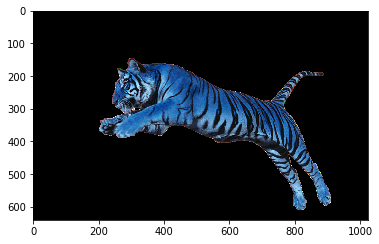

In [319]:
plt.imshow(image)

In [320]:
# what does the image look like?
image.shape

(640, 1024, 3)

## Level 3 - Performing and Understading Convolutions 

### Question 1 

### Why it has 3 dimensions ?? 

Answer - Because of 3 color channels

## Play Around with below code to enhance your understanding of CNN

## Lets create a model with 1 Convolutional layer

### Question 2

### Please fill in the comments 

In [321]:
model = Sequential()
model.add(Convolution2D(3,    # number of filters
                        (3,    # x dimension of kernel 
                        3),    # y dimension of kernel
                        input_shape=image.shape))

In [322]:
image_batch = np.expand_dims(image,axis=0)
image_batch.shape

(1, 640, 1024, 3)

### Question 3

### What Happens if we dont expand the dims of image ? Why we need to do it ?


Answer -we'll have to expand it as it treats the first value of the size as the number of data points

In [323]:
conv_image = model.predict(image_batch)
conv_image.shape

(1, 638, 1022, 3)

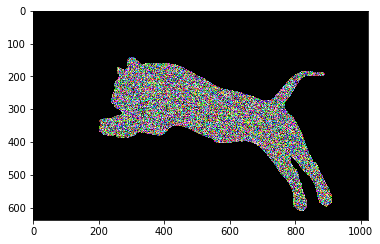

In [324]:
plt.imshow(np.squeeze(conv_image, axis=0))

In [325]:
def visualize_image(model, image):

    image_batch = np.expand_dims(image,axis=0)
    conv_image = model.predict(image_batch)
    
    # here we get rid of that added dimension and plot the image
    conv_image = np.squeeze(conv_image, axis=0)
    
    print (conv_image.shape)
    plt.imshow(conv_image)

(638, 1022, 3)


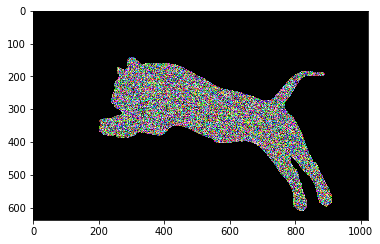

In [326]:
visualize_image(model, image)

## Level 4 - Use Your Conv Function to visualize the image

### Question 1 - Call your function to perform conv and plot the image obatined 

In [327]:
reshaped_image=image.reshape(image.shape[2], image.shape[0], image.shape[1])
reshaped_image.shape

(3, 640, 1024)

In [328]:
convolved_img = get_convolved_array(reshaped_image, filter_list, bias_list, 1)

In [329]:
convolved_image = convolved_img.reshape(convolved_img.shape[1], convolved_img.shape[2], convolved_img.shape[0])

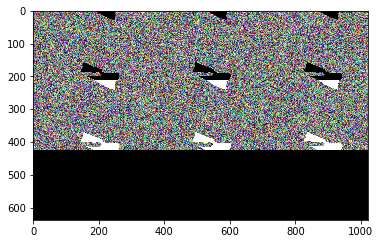

In [330]:
plt.imshow(convolved_image)

## 10x10 Kernel Convimage

(631, 1015, 3)


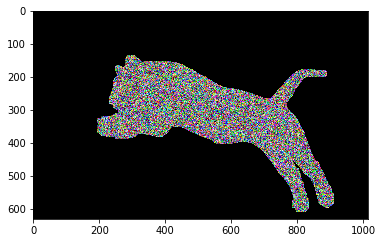

In [331]:
model = Sequential()
model.add(Convolution2D(3,    
                        (10,    
                        10),    
                        input_shape=image.shape))


visualize_image(model, image)

## Level 5

### Question 1

### What difference you notice between 3\*3 and 10\*10 kernal size ? 

Answer - image with 10 * 10 kernel skips many features

### Question 2

### What is the reason behing this difference ?

Answer -because much information is lost by choosing such high kernel size

# Play around with code below, to enhance your understading

## Another image Vis 

In [341]:
# Note: matplot lib is pretty inconsistent with how it plots these weird image arrays.

def nice_image_printer(model, image):
    '''prints the image as a 2d array'''
    image_batch = np.expand_dims(image,axis=0)
    conv_image2 = model.predict(image_batch)

    conv_image2 = np.squeeze(conv_image2, axis=0)
    print (conv_image2.shape)
    conv_image2 = conv_image2.reshape(conv_image2.shape[:2])

    print (conv_image2.shape)
    plt.imshow(conv_image2)

In [342]:
model = Sequential()
model.add(Convolution2D(1,    
                        (3,    
                        3),    
                        input_shape=image.shape))

(638, 1022, 1)
(638, 1022)


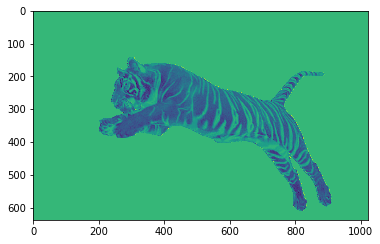

In [343]:
nice_image_printer(model, image)

### Question 3

### Why this image is different from previous one ?

Answer

## Increase the kernal size

(306, 386, 1)
(306, 386)


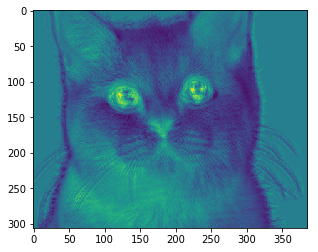

In [118]:
# 15x15 kernel size
model = Sequential()
model.add(Convolution2D(1,    
                        (15,    
                        15),   
                        input_shape=image.shape))

nice_image_printer(model, image)

## Adding a Relu Activation

In [119]:
model = Sequential()
model.add(Convolution2D(1,    
                        (3,    
                        3),    
                        input_shape=image.shape))
# Lets add a new activation layer!
model.add(Activation('relu'))



(318, 398, 1)
(318, 398)


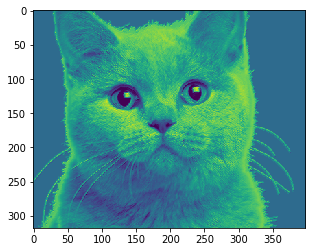

In [120]:
nice_image_printer(model, image)

## Adding a Max pool After Relu

(63, 79, 3)


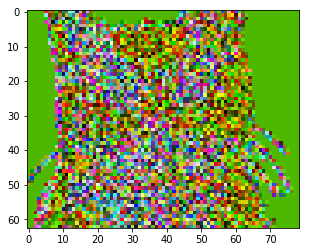

In [121]:
model = Sequential()
model.add(Convolution2D(3,    
                        (3,    
                        3),    
                        input_shape=image.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(5,5)))

visualize_image(model, image)